## Kernal SVM

## Import libraries 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import dataset

In [19]:
# import data set from loacal directory by using pands > read_csv() method
data = pd.read_csv('./Social_Network_Ads.csv')
print("Data Set\n", data)

# split into dependent (Y) and Independent (X) variables
X = data.iloc[ :, :-1].values # all rows and all columns except last column
Y = data.iloc[:, -1].values # all rows and last column

print("Independent Variable (X)\n", X)
print("Dependent Variable (Y)\n", Y)

Data Set
      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]
Independent Variable (X)
 [[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [ 

## Splitting the dataset into the Training set and Test set

In [20]:
# Import test_train_split method from sklean > model_selection
from sklearn.model_selection import train_test_split

# split into train as 80% and train as 20% model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2 , random_state=0)

# View in console
print("X_train\n",X_train)
print("X_test\n", X_test)

print("Y_train\n", Y_train)
print("Y_test\n", Y_test)

X_train
 [[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [   

## Feature Scaling

In [21]:
# import standard scalar from sklearn preprocessing
from sklearn.preprocessing import StandardScaler

# create model
sc = StandardScaler()

# fit trasform into X_train
X_train = sc.fit_transform(X_train)

# transform into X_test
X_test = sc.transform(X_test)

# view values in console
print("Standard Scalar > Fit Transform (X_train) \n", X_train)

print("Standard Scalar > transform (X_test) \n", X_test)

Standard Scalar > Fit Transform (X_train) 
 [[ 1.92295008e+00  2.14601566e+00]
 [ 2.02016082e+00  3.78719297e-01]
 [-1.38221530e+00 -4.32498705e-01]
 [-1.18779381e+00 -1.01194013e+00]
 [ 1.92295008e+00 -9.25023920e-01]
 [ 3.67578135e-01  2.91803083e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.02016082e+00  1.74040666e+00]
 [ 7.56421121e-01 -8.38107706e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [-1.18475597e-01  2.20395980e+00]
 [-1.47942605e+00 -6.35303205e-01]
 [-1.28500455e+00 -1.06988428e+00]
 [-1.38221530e+00  4.07691369e-01]
 [-1.09058306e+00  7.55356227e-01]
 [-1.47942605e+00 -2.00722133e-01]
 [ 9.50842613e-01 -1.06988428e+00]
 [ 9.50842613e-01  5.81523798e-01]
 [ 3.67578135e-01  9.87132798e-01]
 [ 5.61999628e-01 -8.96051849e-01]
 [-6.04529329e-01  1.45068594e+00]
 [-2.12648508e-02 -5.77359062e-01]
 [-6.04529329e-01  1.88526701e+00]
 [ 1.33968560e+00 -1.41754914e+00]
 [ 1.43689635e+00  9.87132798e-01]
 [ 7.59458956e-02 -8.09135634e-01]
 [-2.126485

## Training the Kernel SVM model on the Training set

In [22]:
# import SVc from sklean > SVM
from sklearn.svm import SVC

#  create classifier
classifier = SVC(kernel="rbf", random_state= 0)

# Now fit into model
classifier.fit(X_train, Y_train)

SVC(random_state=0)

## Predicting a new result

In [23]:
# random data from the input file to check wheather our model is right or not?
# classifier.predict(X) is used to pridect our result
# X needs to be Array and expecting as 2d as [[a,b]]
# also we trained our model with staandardScalr so, input of predict is expecting transform values
# so we need to give input as sc.transform([[a,b]])

# hear values our predections are
# Below one expecting as 0
print(classifier.predict(sc.transform([[30, 87000]])))

# Below one expecting as 1
print(classifier.predict(sc.transform([[42, 104000]])))

[0]
[1]


## Predicting the Test set results

In [24]:
# y_pred
y_pred = classifier.predict(X_test)

# view in console
print("y_pred")
print(y_pred)

# mow compare with predicted values with actual values
# we can use numpy to compare values
# numpy will give us True or False
# True means values are same
# False means values are not same
# so we can count how many values are same and how many are not same

print(np.concatenate((y_pred.reshape(len(y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))


# We have some incorrect matching, but will try to correct by Confution matrix
# The Confution Matrix give / to show us no.of correct prediction and no.of incorrect prediction

y_pred
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [25]:
# importing confusion matrix & accuracy_score by sklearn > metrixs
from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix expect 2  i/p , 1st actual result i.e., Y_test, and 2nd is predicted values i.e., y_pred
cm = confusion_matrix(Y_test, y_pred)

# view in console
print("Confusion Matrix")
print(cm)

# Accuracy Score expect 2  i/p , 1st actual result i.e., Y_test, and 2nd is predicted values i.e., y_pred
ac = accuracy_score(Y_test, y_pred)

# view in console
print("Accuracy Score")
print(ac)



Confusion Matrix
[[55  3]
 [ 1 21]]
Accuracy Score
0.95


## Visualising the Training set results

C:\Users\Mohan Govindasamy\AppData\Local\Temp\ipykernel_249876\4063069710.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


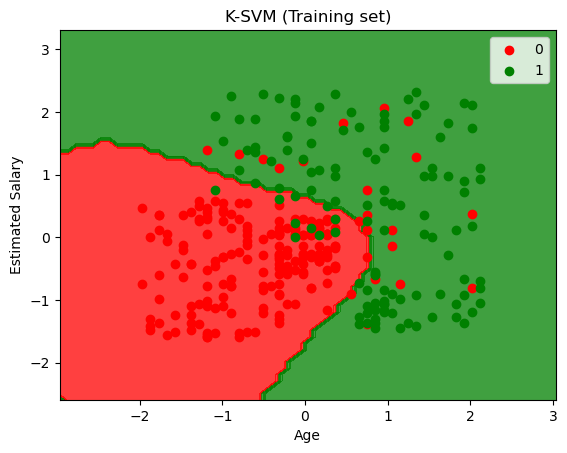

In [26]:
from matplotlib.colors import ListedColormap

# Visualising the Training set results
X_set, y_set = X_train, Y_train  # Assigning training data to X_set and y_set
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.1),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.1),
)
# Creating a grid of points with a distance of 0.5 between them

plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(["red", "green"]),
)
# Plotting the decision boundary by predicting the class for each point in the grid
# and using different colors for different classes

plt.xlim(X1.min(), X1.max())  # Setting the limits of the x-axis
plt.ylim(X2.min(), X2.max())  # Setting the limits of the y-axis

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(["red", "green"])(i),
        label=j,
    )
# Plotting the data points of the training set with different colors for different classes

plt.title("K-SVM (Training set)")  # Setting the title of the plot
plt.xlabel("Age")  # Setting the label for the x-axis
plt.ylabel("Estimated Salary")  # Setting the label for the y-axis
plt.legend()  # Adding a legend to the plot
plt.show()  # Displaying the plot

## Visualising the Test set results

C:\Users\Mohan Govindasamy\AppData\Local\Temp\ipykernel_249876\253694583.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


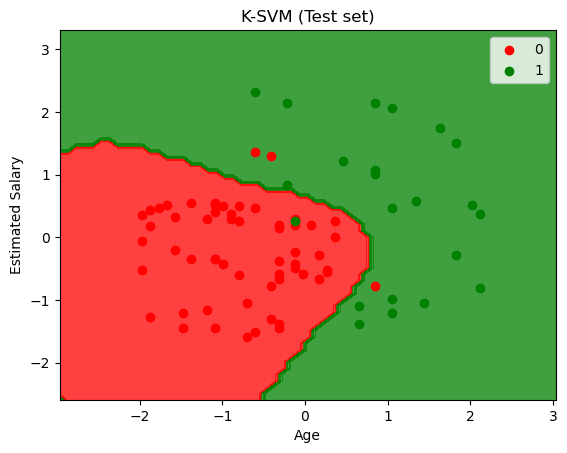

In [27]:
# Visualising the Test set results
X_set, y_set = X_test, Y_test  # Assigning test data to X_set and y_set
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.1),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.1),
)
# Creating a grid of points with a distance of 0.5 between them

plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(["red", "green"]),
)
# Plotting the decision boundary by predicting the class for each point in the grid
# and using different colors for different classes

plt.xlim(X1.min(), X1.max())  # Setting the limits of the x-axis
plt.ylim(X2.min(), X2.max())  # Setting the limits of the y-axis

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(["red", "green"])(i),
        label=j,
    )
# Plotting the data points of the test set with different colors for different classes

plt.title("K-SVM (Test set)")  # Setting the title of the plot
plt.xlabel("Age")  # Setting the label for the x-axis
plt.ylabel("Estimated Salary")  # Setting the label for the y-axis
plt.legend()  # Adding a legend to the plot
plt.show()  # Displaying the plot